In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data1=pd.read_csv("user1_data.csv")
data2=pd.read_csv("user2_data.csv")
print(data1.head(5))
print(data2.head(5))

                 ttime   pm1  pm2  pm3   am      sm     st      lum
0  2022-07-18 15:42:55  3.63  0.0  0.0  3.2  7813.0  25.65  15001.0
1  2022-07-18 15:47:55  4.19  0.0  0.0  4.8  7692.0  25.66  13863.0
2  2022-07-18 15:52:55  4.74  0.0  0.0  4.0  7813.0  25.67  13788.0
3  2022-07-18 15:57:55  5.30  0.0  0.0  4.8  7813.0  25.68  14383.0
4  2022-07-18 16:02:55  0.55  5.3  5.3  3.2  7813.0  25.69  14621.0
                 ttime   pm1   pm2   pm3   am      sm      lum   temp   humd  \
0  2022-07-18 15:39:58  0.83  0.00  0.00  0.0  7463.0   6547.0  23.02  90.57   
1  2022-07-18 15:44:55  1.39  0.00  0.00  0.0  7576.0  10249.0  23.47  88.37   
2  2022-07-18 15:49:55  1.95  0.00  0.00  0.0  7576.0  12636.0  23.64  85.26   
3  2022-07-18 15:54:55  2.51  0.00  0.00  0.0  7463.0   8318.0  23.62  85.93   
4  2022-07-18 15:59:56  0.55  2.51  2.51  0.0  7463.0   4149.0  23.82  86.06   

       pres  
0  92849.25  
1  92848.31  
2  92844.82  
3  92834.94  
4  92815.25  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
data1["humd"]=0
data1["temp"]=0
data1["pres"]=0
data2["st"]=0

In [5]:
data=pd.concat([data1,data2])

In [6]:
data.head(5)

,ttime,pm1,pm2,pm3,am,sm,st,lum,humd,temp,pres
0,2022-07-18 15:42:55,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0,0.0,0.0,0.0
1,2022-07-18 15:47:55,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0,0.0,0.0,0.0
2,2022-07-18 15:52:55,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0,0.0,0.0,0.0
3,2022-07-18 15:57:55,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0,0.0,0.0,0.0
4,2022-07-18 16:02:55,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0,0.0,0.0,0.0


In [7]:
data_s=data.sort_values("ttime",ignore_index=True)
data_s

,ttime,pm1,pm2,pm3,am,sm,st,lum,humd,temp,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,0.00,6547.0,90.57,23.02,92849.25
1,2022-07-18 15:42:55,3.63,0.00,0.00,3.2,7813.0,25.65,15001.0,0.00,0.00,0.00
2,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,0.00,10249.0,88.37,23.47,92848.31
3,2022-07-18 15:47:55,4.19,0.00,0.00,4.8,7692.0,25.66,13863.0,0.00,0.00,0.00
4,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,0.00,12636.0,85.26,23.64,92844.82
...,...,...,...,...,...,...,...,...,...,...,...
39502,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,0.00,7661.0,24.39,30.07,93571.75
39503,2023-03-10 10:06:09,0.55,1.11,28.49,1.6,291.0,29.17,384.0,0.00,0.00,0.00
39504,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,0.00,8386.0,22.99,31.55,93558.36
39505,2023-03-10 10:51:14,1.11,1.67,27.93,2.4,328.0,0.00,8954.0,20.85,32.68,93541.99


In [8]:
ind=data_s.index[(data_s['temp']==0) & (data_s["humd"]==0) &(data_s['pres']==0) ].tolist()

In [9]:
for i in ind:
    if i>=1 and i<len(data_s.index)-2:
        data_s.loc[i, ["temp"]]=(data_s.iloc[i-1].at['temp']+data_s.iloc[i+1].at["temp"])/2
        data_s.loc[i, ["humd"]]=(data_s.iloc[i-1].at['humd']+data_s.iloc[i+1].at["humd"])/2
        data_s.loc[i, ["pres"]]=(data_s.iloc[i-1].at['pres']+data_s.iloc[i+1].at["pres"])/2
# data_s.loc[1, ["temp"]] = 101
# print(data_s.iloc[1].at["temp"])

In [10]:
# print(data_s.head(5))
data_s = data_s.drop(len(data_s.index)-1)

In [11]:
indi=data_s.index[(data_s['st']==0)].tolist()
print(indi)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413, 415, 417, 419, 421,

In [12]:
for i in indi:
    if i>=1 and i<len(data_s.index)-1:
        data_s.loc[i, ["st"]]=(data_s.iloc[i-1].at['st']+data_s.iloc[i+1].at["st"])/2

In [13]:
data_s = data_s.drop(len(data_s.index)-len(data_s.index))
data_s

,ttime,pm1,pm2,pm3,am,sm,st,lum,humd,temp,pres
1,2022-07-18 15:42:55,3.63,0.00,0.00,3.2,7813.0,25.650,15001.0,89.470,23.245,92848.780
2,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,25.655,10249.0,88.370,23.470,92848.310
3,2022-07-18 15:47:55,4.19,0.00,0.00,4.8,7692.0,25.660,13863.0,86.815,23.555,92846.565
4,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,25.665,12636.0,85.260,23.640,92844.820
5,2022-07-18 15:52:55,4.74,0.00,0.00,4.0,7813.0,25.670,13788.0,85.595,23.630,92839.880
...,...,...,...,...,...,...,...,...,...,...,...
39501,2023-03-10 09:39:09,1.11,1.11,28.49,2.4,291.0,29.240,384.0,26.540,29.300,93572.935
39502,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,29.205,7661.0,24.390,30.070,93571.750
39503,2023-03-10 10:06:09,0.55,1.11,28.49,1.6,291.0,29.170,384.0,23.690,30.810,93565.055
39504,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,14.585,8386.0,22.990,31.550,93558.360


In [14]:
df_z_scaled=data_s.copy()
for column in data_s:
    if column != 'ttime' and column!= 'sm':
        df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()

In [15]:
df_z_scaled

,ttime,pm1,pm2,pm3,am,sm,st,lum,humd,temp,pres
1,2022-07-18 15:42:55,1.931816,-2.019171,-2.115198,0.858160,7813.0,-0.147317,2.865778,0.464013,0.208479,0.094283
2,2022-07-18 15:44:55,-0.197695,-2.019171,-2.115198,-0.633184,7576.0,-0.145832,1.749176,0.418095,0.255715,0.094204
3,2022-07-18 15:47:55,2.464194,-2.019171,-2.115198,1.603832,7692.0,-0.144348,2.598377,0.353182,0.273559,0.093909
4,2022-07-18 15:49:55,0.334683,-2.019171,-2.115198,-0.633184,7576.0,-0.142863,2.310062,0.288270,0.291404,0.093615
5,2022-07-18 15:52:55,2.987066,-2.019171,-2.115198,1.230996,7813.0,-0.141379,2.580753,0.302255,0.289304,0.092781
...,...,...,...,...,...,...,...,...,...,...,...
39501,2023-03-10 09:39:09,-0.463884,-1.159500,-1.107009,0.485324,291.0,0.918589,-0.568855,-2.162945,1.479638,0.216511
39502,2023-03-10 09:55:12,0.068494,-1.159500,-1.146289,1.603832,327.0,0.908197,1.141060,-2.252695,1.641288,0.216311
39503,2023-03-10 10:06:09,-0.996262,-1.159500,-1.107009,0.112488,291.0,0.897805,-0.568855,-2.281916,1.796641,0.215181
39504,2023-03-10 10:23:12,-0.996262,-0.725792,-1.126826,1.230996,327.0,-3.432621,1.311417,-2.311136,1.951993,0.214051


In [73]:
df_z_scaled.to_csv('ghi.csv')

In [16]:
date_time = pd.to_datetime(df_z_scaled.pop('ttime'),format='%Y-%m-%d %H:%M')

In [17]:
date_time.head(20)

1    2022-07-18 15:42:55
2    2022-07-18 15:44:55
3    2022-07-18 15:47:55
4    2022-07-18 15:49:55
5    2022-07-18 15:52:55
6    2022-07-18 15:54:55
7    2022-07-18 15:57:55
8    2022-07-18 15:59:56
9    2022-07-18 16:02:55
10   2022-07-18 16:04:55
11   2022-07-18 16:07:55
12   2022-07-18 16:09:55
13   2022-07-18 16:13:03
14   2022-07-18 16:14:55
15   2022-07-18 16:17:55
16   2022-07-18 16:19:55
17   2022-07-18 16:22:55
18   2022-07-18 16:24:56
19   2022-07-18 16:27:55
20   2022-07-18 16:29:55
Name: ttime, dtype: datetime64[ns]

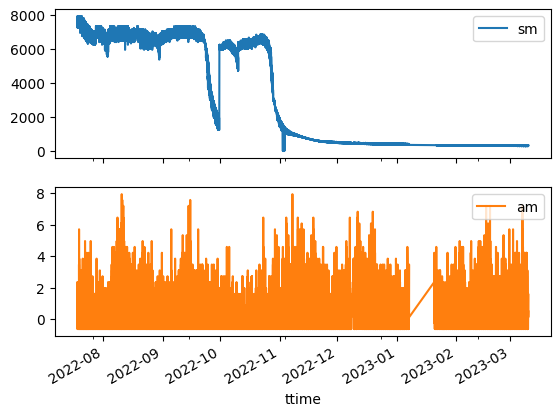

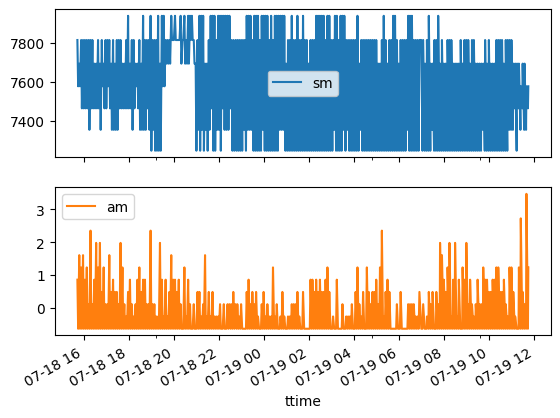

In [18]:
plot_cols = ['sm', 'am']
plot_features = df_z_scaled[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_z_scaled[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [19]:
df_z_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm1,39505.0,4.604454e-17,1.000000,-0.996262,-0.996262,-0.463884,0.600872,4.850388
pm2,39505.0,1.841781e-16,1.000000,-2.019171,-0.725792,-0.292084,0.575332,3.169835
pm3,39505.0,1.611559e-16,1.000000,-2.115198,-0.751011,-0.296281,0.613531,3.322443
am,39505.0,-7.194459e-17,1.000000,-0.633184,-0.633184,-0.633184,0.485324,7.937382
sm,39505.0,4.314564e+03,2993.006198,0.000000,509.000000,6250.000000,6757.000000,7937.000000
st,39505.0,-4.144008e-16,1.000000,-7.763048,-0.049337,0.148108,0.354460,1.491624
lum,39505.0,5.755567e-17,1.000000,-0.659086,-0.658851,-0.648277,0.516731,3.985671
humd,39505.0,4.604454e-16,1.000000,-3.090604,-0.699396,0.411207,0.903579,0.903579
temp,39505.0,5.237566e-16,1.000000,-4.409313,-0.510549,-0.208242,0.696579,3.070949
pres,39505.0,-1.352558e-15,1.000000,-14.595333,0.112710,0.144214,0.177670,0.295815


In [20]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
print(timestamp_s.head(100))

1      1.658159e+09
2      1.658159e+09
3      1.658159e+09
4      1.658159e+09
5      1.658160e+09
           ...     
96     1.658173e+09
97     1.658173e+09
98     1.658173e+09
99     1.658174e+09
100    1.658174e+09
Name: ttime, Length: 100, dtype: float64


In [21]:
day = 24*60*60
year = (365.2425)*day

df_z_scaled['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_z_scaled['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_z_scaled['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_z_scaled['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [22]:
df_z_scaled

,pm1,pm2,pm3,am,sm,st,lum,humd,temp,pres,Day sin,Day cos,Year sin,Year cos
1,1.931816,-2.019171,-2.115198,0.858160,7813.0,-0.147317,2.865778,0.464013,0.208479,0.094283,-0.826385,-0.563105,-0.278787,-0.960353
2,-0.197695,-2.019171,-2.115198,-0.633184,7576.0,-0.145832,1.749176,0.418095,0.255715,0.094204,-0.831268,-0.555873,-0.278810,-0.960346
3,2.464194,-2.019171,-2.115198,1.603832,7692.0,-0.144348,2.598377,0.353182,0.273559,0.093909,-0.838472,-0.544944,-0.278844,-0.960336
4,0.334683,-2.019171,-2.115198,-0.633184,7576.0,-0.142863,2.310062,0.288270,0.291404,0.093615,-0.843196,-0.537606,-0.278867,-0.960330
5,2.987066,-2.019171,-2.115198,1.230996,7813.0,-0.141379,2.580753,0.302255,0.289304,0.092781,-0.850161,-0.526523,-0.278902,-0.960320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39501,-0.463884,-1.159500,-1.107009,0.485324,291.0,0.918589,-0.568855,-2.162945,1.479638,0.216511,0.576611,-0.817019,0.924318,0.381623
39502,0.068494,-1.159500,-1.146289,1.603832,327.0,0.908197,1.141060,-2.252695,1.641288,0.216311,0.518027,-0.855364,0.924391,0.381446
39503,-0.996262,-1.159500,-1.107009,0.112488,291.0,0.897805,-0.568855,-2.281916,1.796641,0.215181,0.476583,-0.879129,0.924441,0.381325
39504,-0.996262,-0.725792,-1.126826,1.230996,327.0,-3.432621,1.311417,-2.311136,1.951993,0.214051,0.409923,-0.912120,0.924519,0.381136


Text(0.5, 1.0, 'Time of day signal')

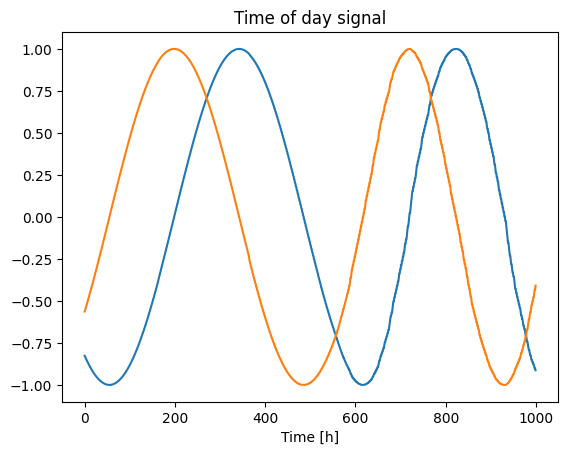

In [23]:
plt.plot(np.array(df_z_scaled['Day sin'])[:1000])
plt.plot(np.array(df_z_scaled['Day cos'])[:1000])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [24]:
column_indices = {name: i for i, name in enumerate(df_z_scaled.columns)}

n = len(df_z_scaled)
train_df = df_z_scaled[0:int(n*0.7)]
val_df = df_z_scaled[int(n*0.7):int(n*0.9)]
test_df = df_z_scaled[int(n*0.9):]

num_features = df_z_scaled.shape[1]

In [25]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [26]:
import seaborn as sns

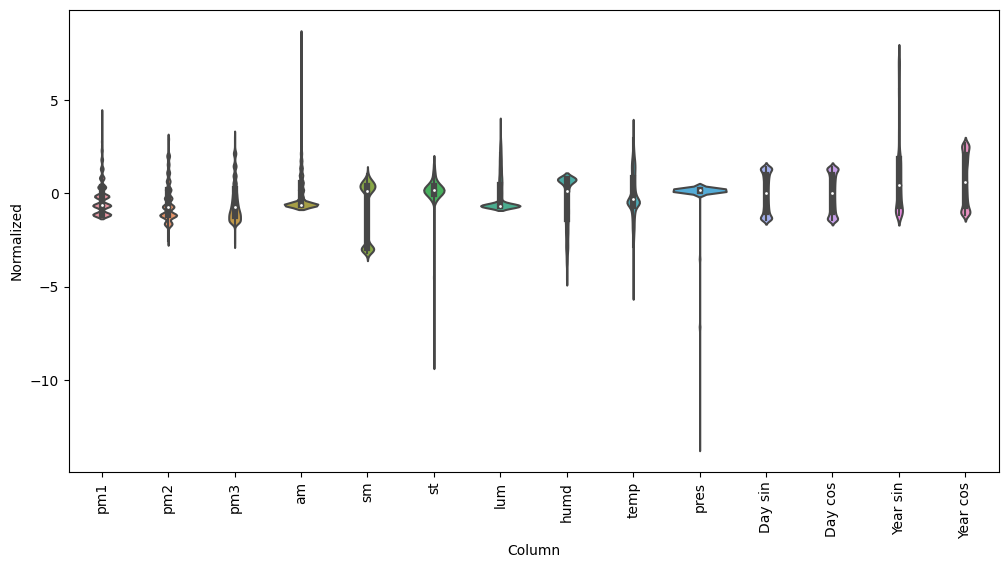

In [27]:
df_std = (df_z_scaled - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_z_scaled.keys(), rotation=90)

In [28]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [29]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['sm'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['sm']

In [30]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['sm'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['sm']

In [31]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [32]:
import tensorflow as tf

In [33]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 14)
Inputs shape: (3, 6, 14)
Labels shape: (3, 1, 1)


In [34]:
w2.example = example_inputs, example_labels

In [174]:
def plot(self, model=None, plot_col='sm', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      print(predictions[:,0,0].shape)
#       print(label_col_index)
      print(self.label_indices.shape)
      plt.scatter(self.label_indices, predictions[:,0,0],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

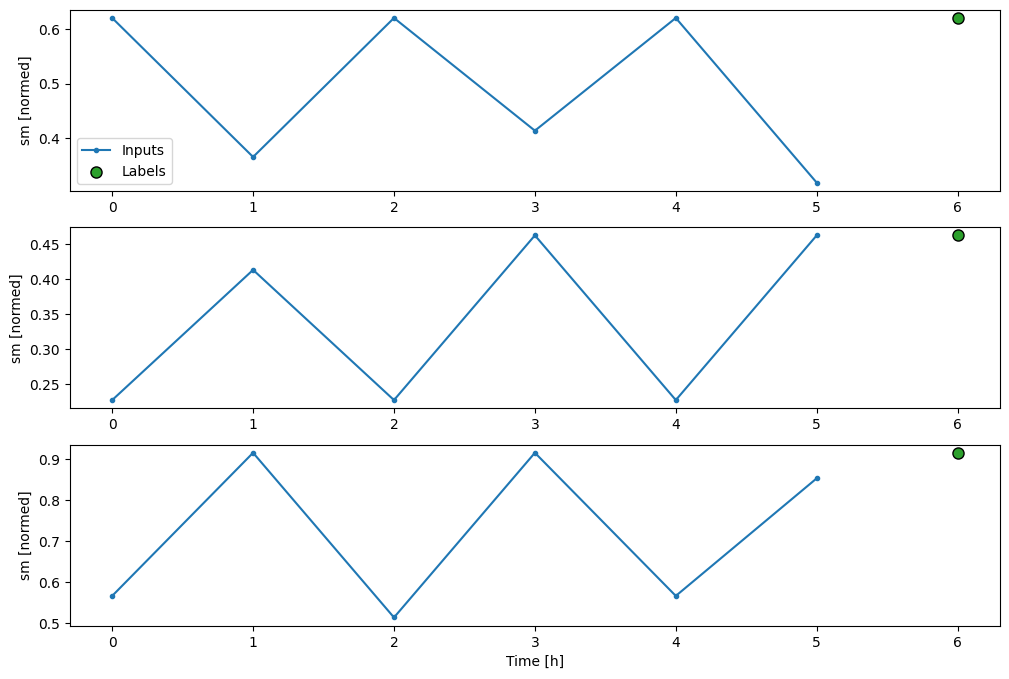

In [146]:
w2.plot()

In [147]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=24,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [148]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [149]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [150]:
baseline = Baseline(label_index=column_indices['sm'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [151]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['sm'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['sm']

In [152]:
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

329/329 [==============================] - 0s 1ms/step - loss: 6.6163e-04 - mean_absolute_error: 0.0233


(24,)
(24,)
(24,)
(24,)
(24,)
(24,)


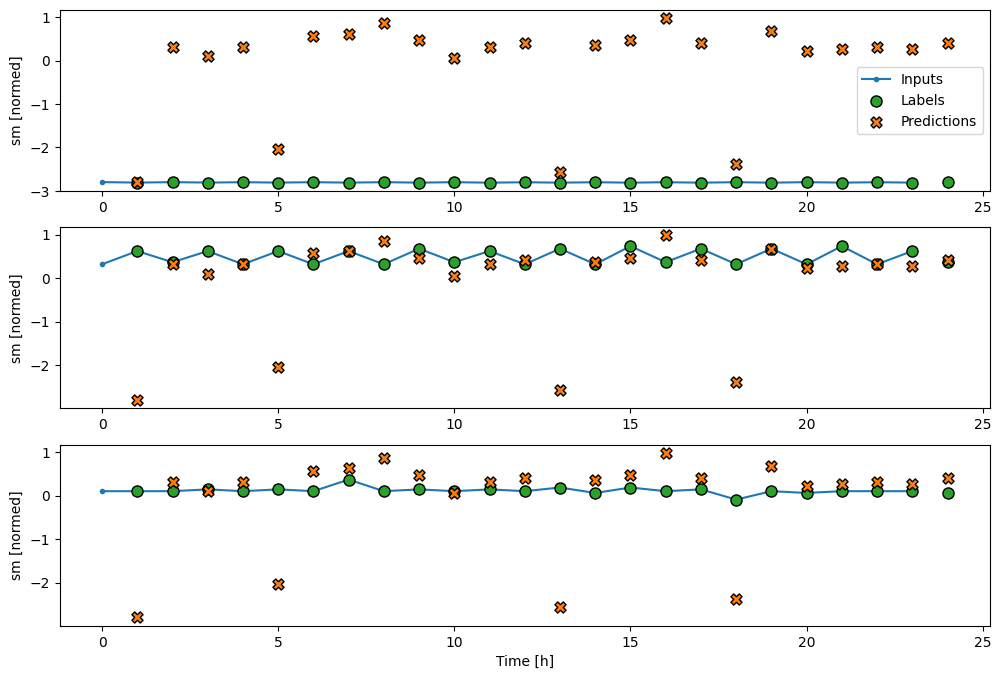

In [186]:
wide_window.plot(baseline)

In [154]:
# model.add(tf.keras.Input(shape=(x_train.shape[1],))) 
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu')) 
# model.add(tf.keras.layers.Dense(1, activation='relu'))

In [178]:
dense=tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.Input(shape=(14,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),]
)
# dense.add(tf.keras.layers.Dense(32, input_shape=(wide_window.train_df.shape[1],), activation='relu'))


In [179]:
stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')
dense.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
hist=dense.fit(wide_window.train,epochs=10,validation_data=wide_window.val,callbacks=[stop])

Epoch 1/10
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0678 - mean_absolute_error: 0.1602 - val_loss: 0.0345 - val_mean_absolute_error: 0.1357
Epoch 2/10
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0253 - mean_absolute_error: 0.1208 - val_loss: 0.0394 - val_mean_absolute_error: 0.1382
Epoch 3/10
1152/1152 [==============================] - 2s 2ms/step - loss: 0.0239 - mean_absolute_error: 0.1179 - val_loss: 0.0368 - val_mean_absolute_error: 0.1421


In [180]:
dense.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 24, 32)            480       
                                                                 
 dense_67 (Dense)            (None, 24, 32)            1056      
                                                                 
 dense_68 (Dense)            (None, 24, 1)             33        
                                                                 
 reshape_21 (Reshape)        (None, 1, 24)             0         
                                                                 
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


In [181]:
val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=1)
print(performance['Dense'])

164/164 [==============================] - 0s 860us/step - loss: 0.1523 - mean_absolute_error: 0.3192
[0.1523151397705078, 0.31920820474624634]


(24,)
(24,)
(24,)
(24,)
(24,)
(24,)


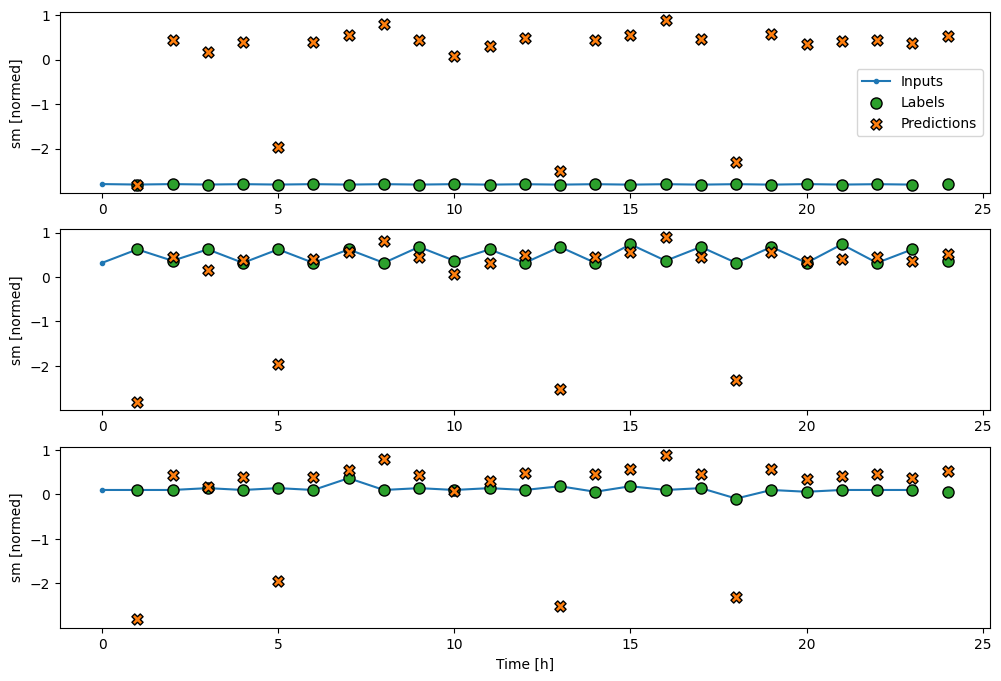

In [182]:
wide_window.plot(dense)


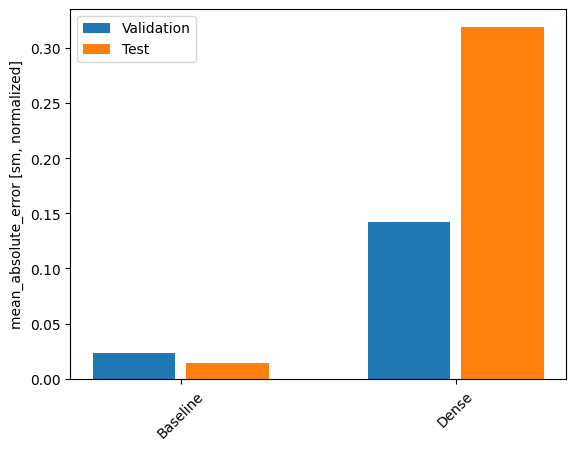

In [187]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = dense.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [sm, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [184]:
from keras.models import load_model

dense.save('my_model.h5')

In [185]:
wide_window.train

<MapDataset element_spec=(TensorSpec(shape=(None, 24, 14), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None))>